In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data

In [4]:
df=pd.read_csv("Ecommerce Customers")

In [5]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## there is no null data so no need for data cleaning

In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## from this we can infer our target feature has an average or 50% of the value lies between 500$
## the average time spend on app is lesser than average time spend in website 
## the average time on session length and wesite seems to much closer
## the average length of membership is 3.5 years

In [11]:
df_1=df.copy()

In [12]:
df_1.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
df_1.drop(columns=['Email', 'Address', 'Avatar'],axis=1,inplace=True)

<Axes: >

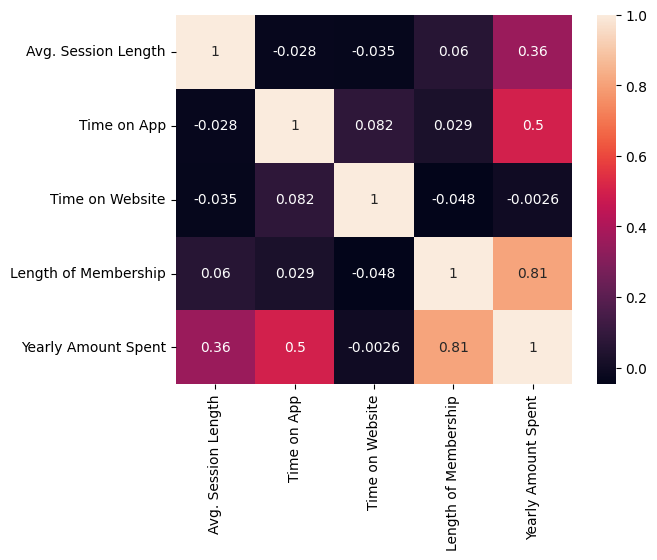

In [14]:
sns.heatmap(df_1.corr(),annot=True)

## from this heatmap we can infer that our target value has positive correlation with length of membership,avg.session length,time on app and negative correlation with time on website

## the length of membership increases then the amount spent also increases.
## followed by higher the time spent on App higher the amount spending
## even session time too contributes to the amount spending

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

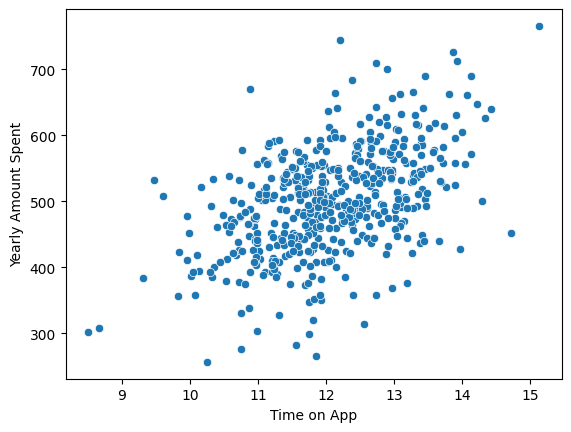

In [17]:
sns.scatterplot(data=df_1,x='Time on App',y='Yearly Amount Spent')

## as time on app increses with the amount spent

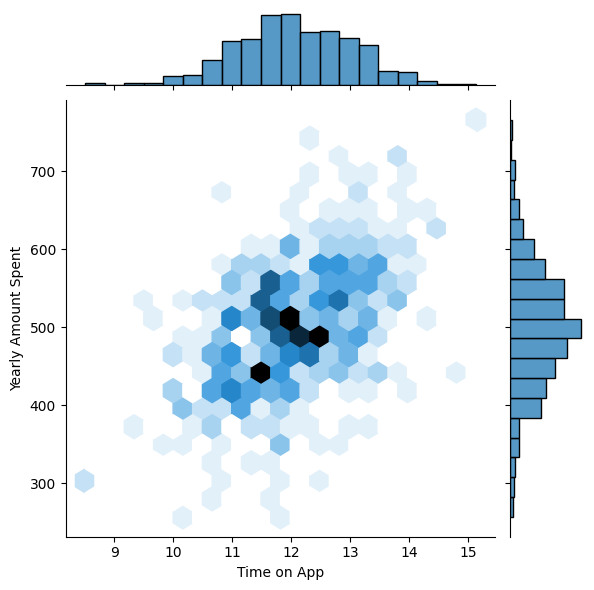

In [19]:
sns.jointplot(data=df_1,x='Time on App',y='Yearly Amount Spent',kind='hex')

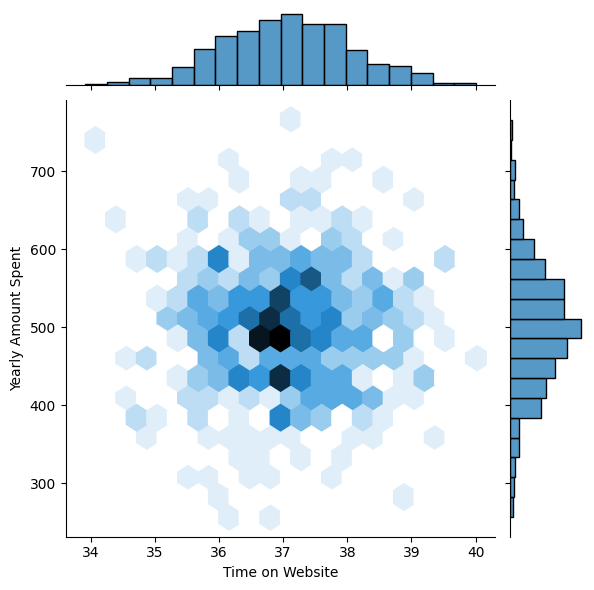

In [20]:
sns.jointplot(data=df_1,x='Time on Website',y='Yearly Amount Spent',kind='hex')

## in this plot above we can infer the time spent on website and amount spent does not show any pattern

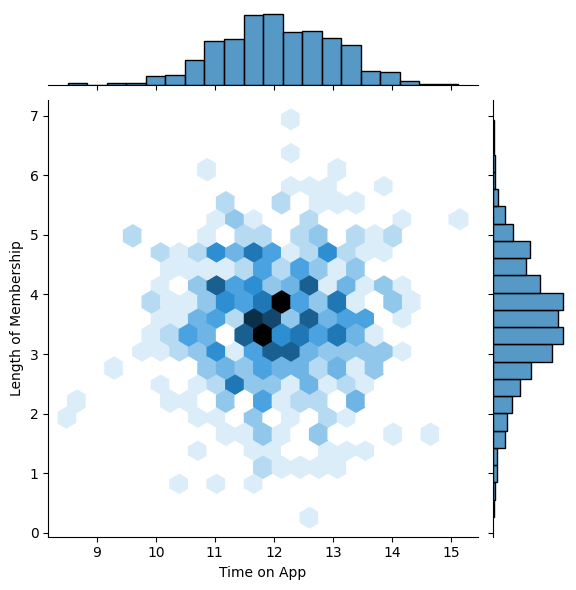

In [21]:
sns.jointplot(data=df_1,x='Time on App',y='Length of Membership',kind='hex')

## from the plot above we can see the higher density have been found with membership of 3-5 years to time on app between 11-14 minutes

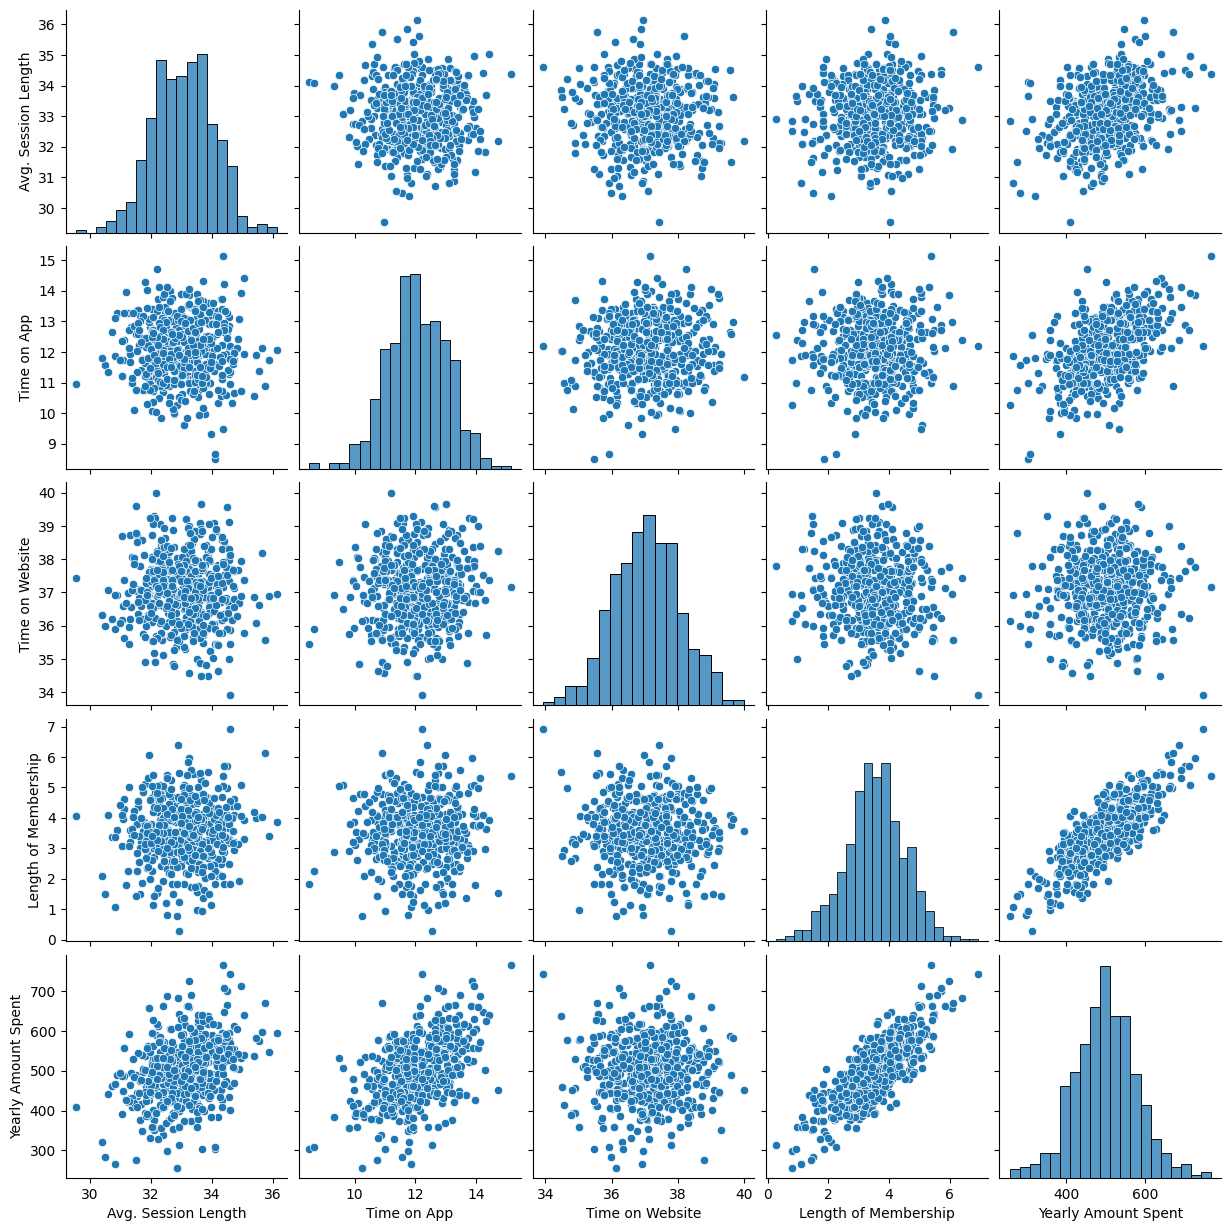

In [23]:
sns.pairplot(df_1)

## the length of time,time on App,Avg.session length showing some patter with our target variable
## all the features tend to be distributed normally

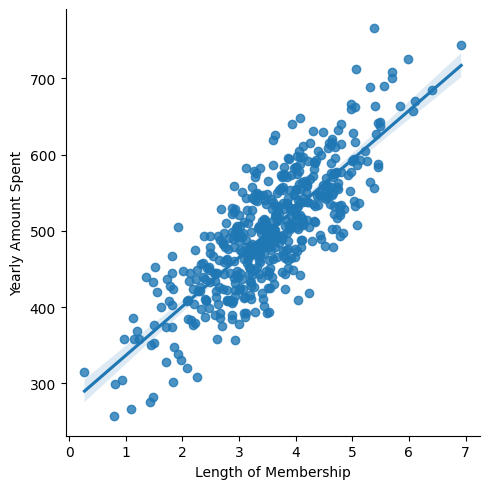

In [24]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df_1)

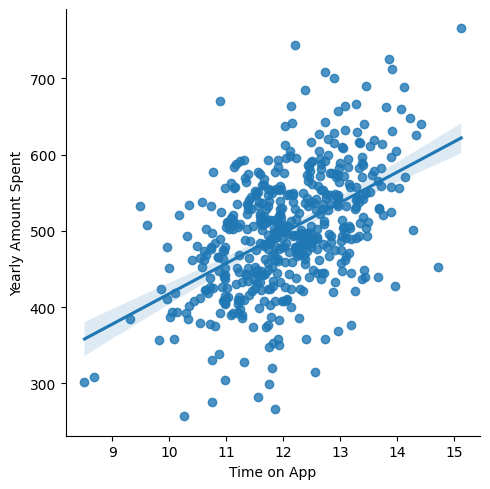

In [25]:
sns.lmplot(x='Time on App',y='Yearly Amount Spent',data=df_1)

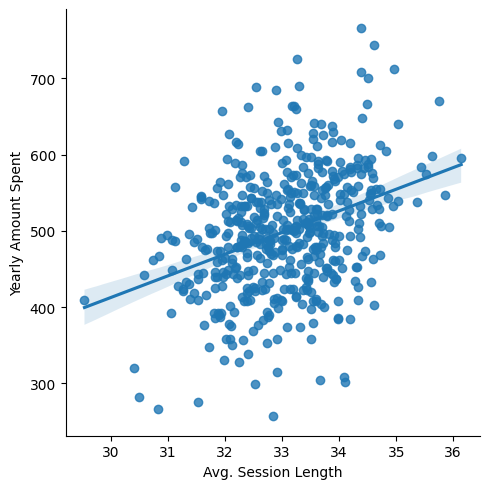

In [26]:
sns.lmplot(x='Avg. Session Length',y='Yearly Amount Spent',data=df_1)

In [27]:
y=df_1['Yearly Amount Spent']

In [28]:
X=df_1[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]

In [29]:
X.shape

(500, 4)

In [30]:
y.shape

(500,)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [33]:
X_train.shape

(350, 4)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr_model=LinearRegression()

In [36]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [37]:
print(lr_model.intercept_)

-1041.7393064380394


In [38]:
lr_model.coef_

array([25.67128004, 38.70819291,  0.20742337, 61.78910122])

In [39]:
d=pd.DataFrame(lr_model.coef_,X.columns,columns=['coefficients'])

In [40]:
d

,coefficients
Avg. Session Length,25.671280
Time on App,38.708193
Time on Website,0.207423
Length of Membership,61.789101


## from this we can infere the unit increases in Avg.Session length corresponds to unit increases of 25.67 of our target variable
## the unit increses on Time on App increses 38.7 unit increses for out target variable
## from the correlation we have found there exist negative relation between time on website and the Amount spent but our Predictions time spent on website too contributes positive to amount spent
## unit increases of length of membership corresponds to unit increases of 61 of our target variable

In [42]:
predictions=lr_model.predict(X_test)

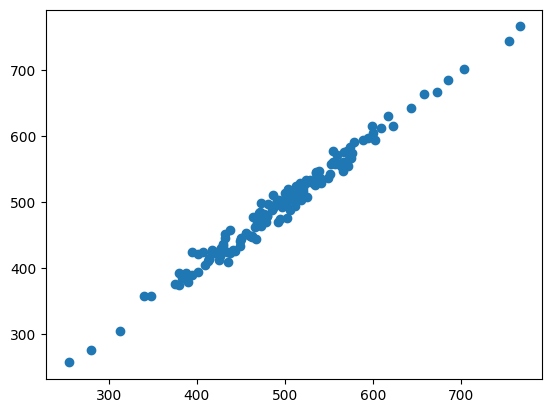

In [43]:
plt.scatter(predictions,y_test)

## our predictions for X_test

In [44]:
from sklearn import metrics

In [45]:
print(f'MAE {metrics.mean_absolute_error(predictions,y_test)}')
print(f'MSE {metrics.mean_squared_error(predictions,y_test)}')
print(f'RMSE {np.sqrt(metrics.mean_squared_error(predictions,y_test))}')

MAE 8.753449919562726
MSE 118.31895009209101
RMSE 10.87745145206776


## Even though Absolute Mean Error shows lessser but it leaves out some larger Errors
## From RMSE we can infere our model has Variability of not more than $10 to our target Amount the model seems to be good.

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

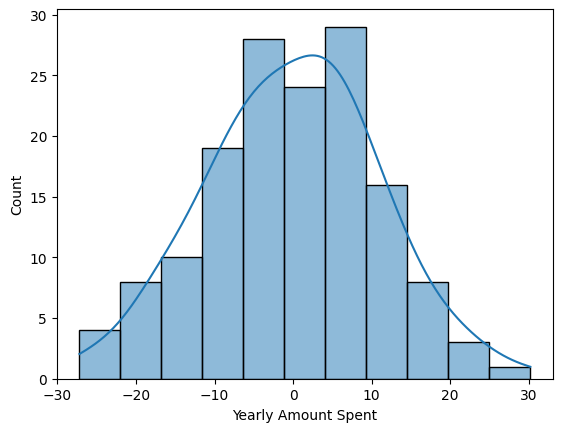

In [47]:
sns.histplot(y_test-predictions,kde=True)

# residuals plot distributed normally
## This assumption implies that the model captures the main patterns and sources of variation in the data, and that the errors are random and independent.

In [48]:
print(metrics.explained_variance_score(predictions,y_test))

0.9812980615567154


## solutions

## As per the bussiness problem
## the company Already Making good revenue From the App
## but the Revenue from Website seems to be poor,so they can focus more on developing the website more user firendly
## since time spent on website seems to be higher we cannot ignore the wesite
## if possible the App could also be imporved slightly but concentrate more on Developing the Website more User Friendly